In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
#218670687
#chakela SM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense,InputLayer,BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip /content/drive/MyDrive/train_nLPp5K8.zip 

Streaming output truncated to the last 5000 lines.
  inflating: images/5250.jpg         
  inflating: images/5251.jpg         
  inflating: images/5252.jpg         
  inflating: images/5253.jpg         
  inflating: images/5254.jpg         
  inflating: images/5255.jpg         
  inflating: images/5256.jpg         
  inflating: images/5257.jpg         
  inflating: images/5258.jpg         
  inflating: images/5259.jpg         
  inflating: images/5260.jpg         
  inflating: images/5261.jpg         
  inflating: images/5262.jpg         
  inflating: images/5263.jpg         
  inflating: images/5264.jpg         
  inflating: images/5265.jpg         
  inflating: images/5266.jpg         
  inflating: images/5267.jpg         
  inflating: images/5268.jpg         
  inflating: images/5269.jpg         
  inflating: images/5270.jpg         
  inflating: images/5271.jpg         
  inflating: images/5272.jpg         
  inflating: images/5273.jpg         
  inflating: images/5274.jpg         

In [5]:
seed=42

In [6]:
data=pd.read_csv('train.csv')

In [7]:
x=[]
for img_name in data.image_names:
    img=plt.imread('images/' +img_name)
    x.append(img) 
    
x=np.array(x)

y=data['class']

In [8]:
x.shape

(12196, 224, 224, 3)

Pre-processing the data

In [9]:
#x = x / x.max()

Creating Training and Validation set

In [10]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.3,random_state=seed)

In [11]:
(x_train.shape, y_train.shape),(x_valid.shape, y_valid.shape)

(((8537, 224, 224, 3), (8537,)), ((3659, 224, 224, 3), (3659,)))

**Defining** **the** **Model** **Architecture**

In [12]:
from keras.layers import Conv2D,Flatten

In [13]:
model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu',strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu',strides=(1, 1), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 25)      1900      
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 216, 50)      31300     
                                                                 
 flatten (Flatten)           (None, 2332800)           0         
                                                                 
 dense (Dense)               (None, 100)               233280100 
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 233,313,401
Trainable params: 233,313,401
Non-trainable params: 0
_________________________________________________________________


**Compiling** **the** **Model**

In [15]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

**Train** **the** **model**

In [17]:
model_history = model.fit(x_train, y_train,epochs=10,batch_size=128,validation_data=(x_valid,y_valid))

Epoch 1/10
67/67 [==============================] - 57s 614ms/step - loss: 0.6977 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5149
Epoch 2/10
67/67 [==============================] - 34s 510ms/step - loss: 0.6934 - accuracy: 0.5038 - val_loss: 0.6946 - val_accuracy: 0.4843
Epoch 3/10
67/67 [==============================] - 34s 508ms/step - loss: 0.6934 - accuracy: 0.5072 - val_loss: 0.6939 - val_accuracy: 0.4843
Epoch 4/10
67/67 [==============================] - 34s 512ms/step - loss: 0.6935 - accuracy: 0.4989 - val_loss: 0.6927 - val_accuracy: 0.5157
Epoch 5/10
67/67 [==============================] - 34s 513ms/step - loss: 0.6936 - accuracy: 0.4958 - val_loss: 0.6928 - val_accuracy: 0.5157
Epoch 6/10
67/67 [==============================] - 34s 513ms/step - loss: 0.6934 - accuracy: 0.5035 - val_loss: 0.6928 - val_accuracy: 0.5157
Epoch 7/10
67/67 [==============================] - 34s 512ms/step - loss: 0.6936 - accuracy: 0.4909 - val_loss: 0.6928 - val_accuracy: 0.5157

**Evaluating** **Model** **Performance**

In [25]:
print('Accuracy on training set:',accuracy_score(y_train,model.predict_classes(x_train)),"%")

AttributeError: ignored

In [26]:
print('Accuracy on training set:',accuracy_score(y_valid,model.predict_classes(x_train)),"%")

AttributeError: ignored

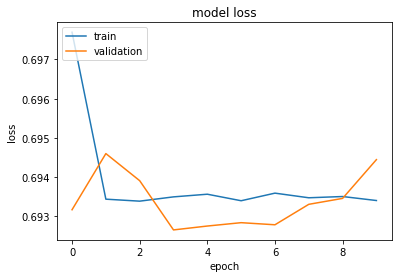

In [23]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

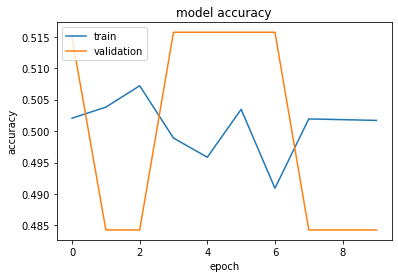

In [27]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()